In [ ]:
!pip install pytorch_tabular[all]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

## 5-6

In [ ]:
df1 = pd.read_csv('5-6_Balanced_Stunting.csv')
df2 = pd.read_csv('5-6_Balanced_Wasting.csv')
df3 = pd.read_csv('5-6_Balanced_Stunted_Wasting.csv')

In [ ]:
df1 = df1.drop(['Unnamed: 0'], axis =1)
df2 = df2.drop(['Unnamed: 0'], axis = 1)
df3 = df3.drop(['Unnamed: 0'], axis =1)

In [ ]:
train1, test1 = train_test_split(df1, test_size=0.15, random_state = 23)
train1, val1 = train_test_split(train1, test_size=0.1, random_state = 5)
train2, test2 = train_test_split(df2, test_size=0.15, random_state = 76)
train2, val2 = train_test_split(train2, test_size=0.1, random_state = 37)
train3, test3 = train_test_split(df3, test_size=0.15, random_state = 94)
train3, val3 = train_test_split(train3, test_size=0.1, random_state = 89)

In [ ]:
y1_test = test1['H/A'] 
y2_test = test2['W/H']
y3_test = test3['HAWH']

### H/A

In [ ]:
train1.columns

Index(['state', 'area', 'religion', 'caste', 'type of family',
       'father's education', 'father's occupation', 'mother's education',
       'mother's occupation', 'total family members', 'exposure to mass media',
       'Source of drinking water', 'Toilet Facility', 'mother's age',
       'mother's bmi', 'child's age', 'sex of child', 'birth weight',
       'initiation of bf(early initiation)', 'wealth index', 'months of bf',
       'history of illness', 'immunization', 'index to birth history',
       'no of living children', 'sex of household head', 'dietary score',
       'H/A'],
      dtype='object')

In [ ]:
cat_col_names = ['state', 'area', 'religion', 'caste', 'type of family',
       'father\'s education', 'father\'s occupation', 'mother\'s education',
       'mother\'s occupation', 'total family members', 'exposure to mass media',
       'Source of drinking water', 'Toilet Facility', 'mother\'s age',
       'mother\'s bmi', 'child\'s age', 'sex of child', 'birth weight',
       'initiation of bf(early initiation)', 'wealth index', 'months of bf',
       'history of illness', 'immunization', 'index to birth history',
       'no of living children', 'sex of household head', 'dietary score']

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['H/A'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    # continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=False, # Runs the LRFinder to automatically derive a learning rate
    batch_size=160,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="1024-512-256-128-64",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 2e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train1, validation=val1)
result = tabular_model.evaluate(test1)
pred_df = tabular_model.predict(test1)
pred_y1 = pred_df['prediction']
# tabular_model.save_model("examples/basic")
# loaded_model = TabularModel.load_from_checkpoint("examples/basic")

Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 986   
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 789 K 
3 | output_layer           | Linear              | 130   
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
790 K     Trainable params
0         Non-trainable params
790 K     Total params
3.162     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6341754794120789}
--------------------------------------------------------------------------------


Generating Predictions...:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y1_test, pred_y1)
roc_auc = metrics.auc(fpr, tpr)

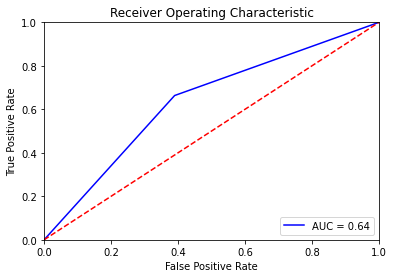

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### WH

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['W/H'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    # continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="4096-4096-512",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train2, validation=val2)
result = tabular_model.evaluate(test2)
pred_df = tabular_model.predict(test2)
pred_y2 = pred_df['prediction']

# tabular_model.save_model("examples/basic")
# loaded_model = TabularModel.load_from_checkpoint("examples/basic")

Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 986   
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 19.2 M
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
19.2 M    Trainable params
0         Non-trainable params
19.2 M    Total params
76.999    Total estimated model params size (MB)
Global seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------


Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt
Learning rate set to 0.0005248074602497723
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 986   
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 19.2 M
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
19.2 M    Trainable params
0         Non-trainable params
19.2 M    Total params
76.999    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 7it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7032328844070435}
--------------------------------------------------------------------------------


Generating Predictions...:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y2_test, pred_y2)
roc_auc = metrics.auc(fpr, tpr)

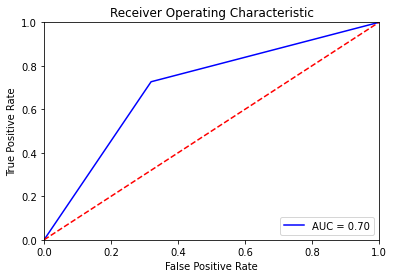

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['HAWH'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    # continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=1600,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="4096-512",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1.5e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train3, validation=val3)
result = tabular_model.evaluate(test3)
pred_df = tabular_model.predict(test3)
# tabular_model.save_model("examples/basic")
# loaded_model = TabularModel.load_from_checkpoint("examples/basic")

Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 989   
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 2.5 M 
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
9.873     Total estimated model params size (MB)
Global seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------


Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt
Learning rate set to 0.001584893192461114
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 989   
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 2.5 M 
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
9.873     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 31it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.764485776424408}
--------------------------------------------------------------------------------


Generating Predictions...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import sklearn.metrics as metrics
pred_y3 = pred_df['prediction']
fpr, tpr, threshold = metrics.roc_curve(y3_test, pred_y3)
roc_auc = metrics.auc(fpr, tpr)

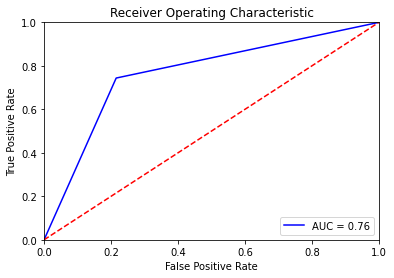

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 15-16

In [ ]:
df1 = pd.read_csv('15-16_Balanced_Stunting.csv')
df2 = pd.read_csv('15-16_Balanced_Wasting.csv')
df3 = pd.read_csv('15-16_Balanced_Stunted_Wasting.csv')

In [ ]:
df1 = df1.drop(['Unnamed: 0'], axis =1)
df2 = df2.drop(['Unnamed: 0'], axis = 1)
df3 = df3.drop(['Unnamed: 0'], axis =1)

In [ ]:
train1, test1 = train_test_split(df1, test_size=0.15, random_state = 23)
train1, val1 = train_test_split(train1, test_size=0.1, random_state = 5)
train2, test2 = train_test_split(df2, test_size=0.15, random_state = 76)
train2, val2 = train_test_split(train2, test_size=0.1, random_state = 37)
train3, test3 = train_test_split(df3, test_size=0.15, random_state = 94)
train3, val3 = train_test_split(train3, test_size=0.1, random_state = 89)

In [ ]:
y1_test = test1['H/A'] 
y2_test = test2['W/H']
y3_test = test3['HAWH']

### H/A

In [ ]:
train1.columns

Index(['State', 'Area', 'Religion', 'caste', 'mothers education',
       'source of water', 'toilet facility', 'no of members',
       'no of living children', 'mothers age(at first birth)',
       'sex of household head', 'wealth index', 'initiaion of bf',
       'sex of child', 'months of bf', 'mothers bmi', 'child's age',
       'index to birth history', 'birth weight', 'history of illness',
       'Exposure to mass media', 'dietary score', 'immunization', 'H/A'],
      dtype='object')

In [ ]:
cat_col_names = ['State', 'Area', 'Religion', 'caste', 'mothers education',
       'source of water', 'toilet facility', 'no of members',
       'no of living children', 'mothers age(at first birth)',
       'sex of household head', 'wealth index', 'initiaion of bf',
       'sex of child', 'months of bf', 'mothers bmi', 'child\'s age',
       'index to birth history', 'birth weight', 'history of illness',
       'Exposure to mass media', 'dietary score', 'immunization']

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['H/A'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    # continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=False, # Runs the LRFinder to automatically derive a learning rate
    batch_size=160,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="1024-512-256-128-64",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 2e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train1, validation=val1)
result = tabular_model.evaluate(test1)
pred_df = tabular_model.predict(test1)
pred_y1 = pred_df['prediction']
# tabular_model.save_model("examples/basic")
# loaded_model = TabularModel.load_from_checkpoint("examples/basic")

Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 1.2 K 
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 784 K 
3 | output_layer           | Linear              | 130   
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
785 K     Trainable params
0         Non-trainable params
785 K     Total params
3.142     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6436314582824707}
--------------------------------------------------------------------------------


Generating Predictions...:   0%|          | 0/213 [00:00<?, ?it/s]

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y1_test, pred_y1)
roc_auc = metrics.auc(fpr, tpr)

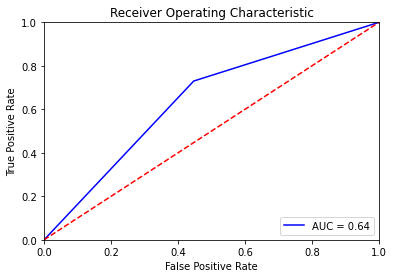

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['W/H'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    # continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="4096-4096-512",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train2, validation=val2)
result = tabular_model.evaluate(test2)
pred_df = tabular_model.predict(test2)
pred_y2 = pred_df['prediction']

# tabular_model.save_model("examples/basic")
# loaded_model = TabularModel.load_from_checkpoint("examples/basic")

Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 1.2 K 
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 19.2 M
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
19.2 M    Trainable params
0         Non-trainable params
19.2 M    Total params
76.917    Total estimated model params size (MB)
Global seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt
Learning rate set to 0.000630957344480193
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 1.2 K 
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 19.2 M
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
19.2 M    Trainable params
0         Non-trainable params
19.2 M    Total params
76.917    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 99it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6610715389251709}
--------------------------------------------------------------------------------


Generating Predictions...:   0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y2_test, pred_y2)
roc_auc = metrics.auc(fpr, tpr)

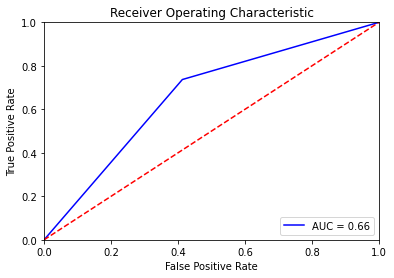

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['HAWH'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    # continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=1600,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="4096-4096-1024-512-128",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1.5e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train3, validation=val3)
result = tabular_model.evaluate(test3)
pred_df = tabular_model.predict(test3)
# tabular_model.save_model("examples/basic")
# loaded_model = TabularModel.load_from_checkpoint("examples/basic")

Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 1.2 K 
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 21.9 M
3 | output_layer           | Linear              | 258   
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
21.9 M    Trainable params
0         Non-trainable params
21.9 M    Total params
87.667    Total estimated model params size (MB)
Global seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt
Learning rate set to 0.0010964781961431851
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 1.2 K 
1 | normalizing_batch_norm | BatchNorm1d         | 0     
2 | backbone               | FeedForwardBackbone | 21.9 M
3 | output_layer           | Linear              | 258   
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
21.9 M    Trainable params
0         Non-trainable params
21.9 M    Total params
87.667    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 99it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7336547374725342}
--------------------------------------------------------------------------------


Generating Predictions...:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
import sklearn.metrics as metrics
pred_y3 = pred_df['prediction']
fpr, tpr, threshold = metrics.roc_curve(y3_test, pred_y3)
roc_auc = metrics.auc(fpr, tpr)

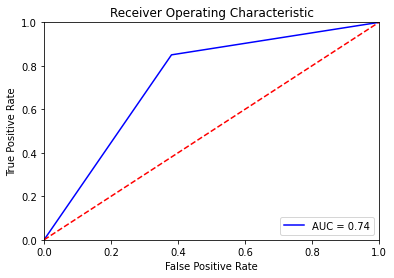

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()